In [4]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import json
s = json.load( open(os.getenv('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


#IDEA
## women are less likely than men to choose biking for commuting 

#NULL HYPOTHESIS
##the ratio of man biking on week days to that of man biking on weekends is higher than the same ratio for women

# reading data from citibike csv file from Jan 2015

what i want is the date and time of the beginning of each trip. pandas has an easy method to read csv files, and an easy method to convert strinds to dates.

if i read a csv file with pandas the content is stored in a "DataFrame". For now you can think of it as a dictionary, with added capabilities.

In [53]:

df=pd.read_csv('data/201501-citibike-tripdata.csv')
#df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
#note that with dataframes i can refer to variables as dictionary keys, i.e. df['starttime'] or as attributes: df.starttime. 


#lets separate males (_m) from females (_w) to test various hypothesis 
in this csv file gender == 1 is male, gender == 2 is female

lets plot the number of trips oer week day

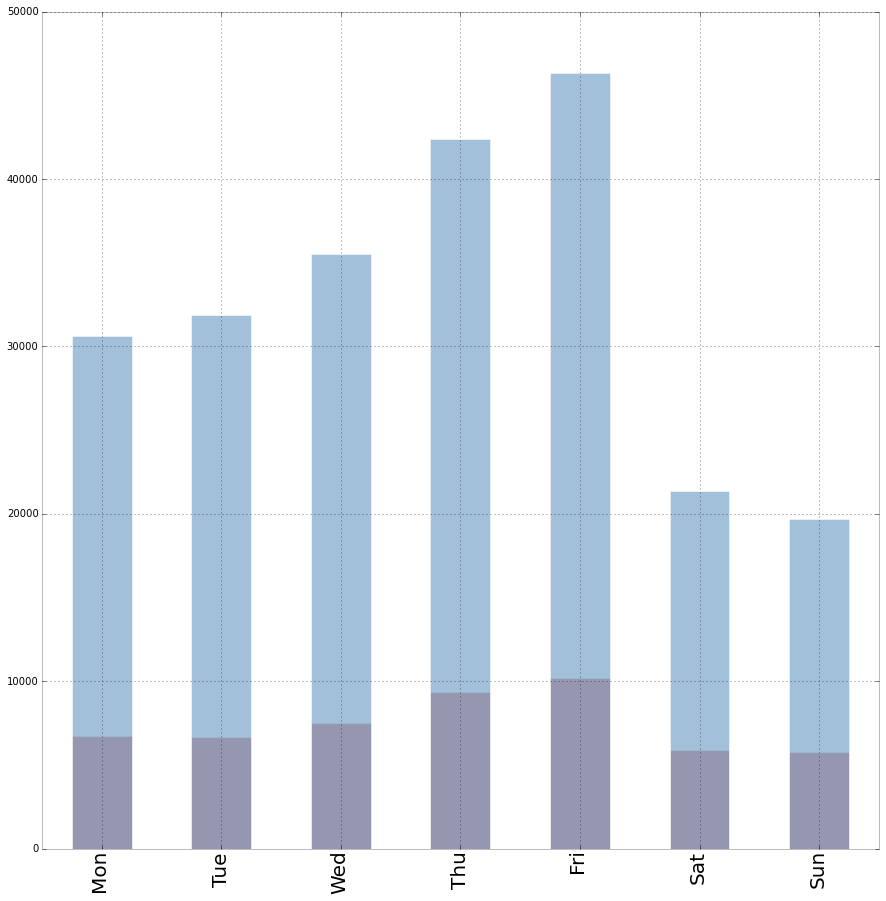

In [54]:
fig=pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
((df['date'][df['gender']==2].groupby([df['date'].dt.weekday]).count())/norm_w).plot(kind="bar", color='IndianRed', alpha=0.5)

norm_m = 1
ax=((df['date'][df['gender']==1].groupby([df['date'].dt.weekday]).count())/norm_m).plot(kind="bar", alpha=0.5)

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)

the counts have errors of course. what is the error on the count statistics?

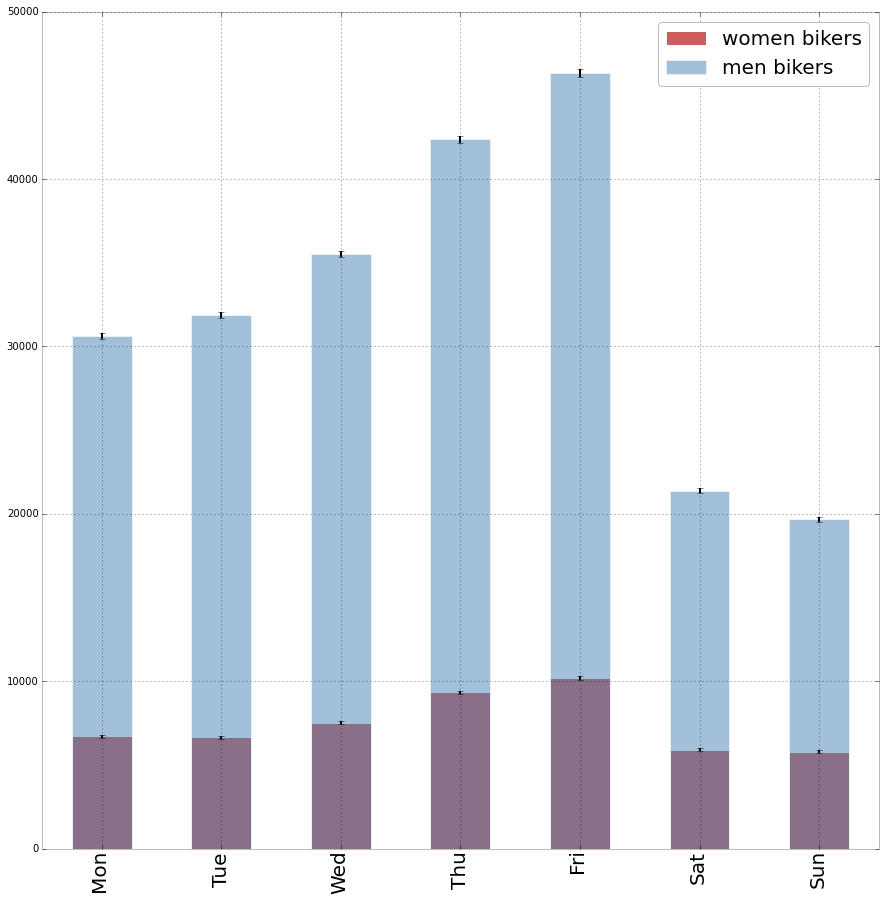

In [55]:
fig=pl.figure(figsize(15,15))

counts_w= df.date[df.gender==2].groupby([df.date.dt.weekday]).count()
norm_w = 1
error_w=np.sqrt(counts_w)
ax=((counts_w)/norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w)/norm_w,(error_w)/norm_w)], label='women bikers')


counts_m=df.date[df.gender==1].groupby([df.date.dt.weekday]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
((counts_m)/norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m)/norm_m,(error_m)/norm_m)], label='men bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)

pl.legend(['women bikers','men bikers'],fontsize=20)


these are absolute numbers. it is very hard to compare absolute numbers. ratios are more ameable to comparison, so let's normalize the distribution of man, and that of women



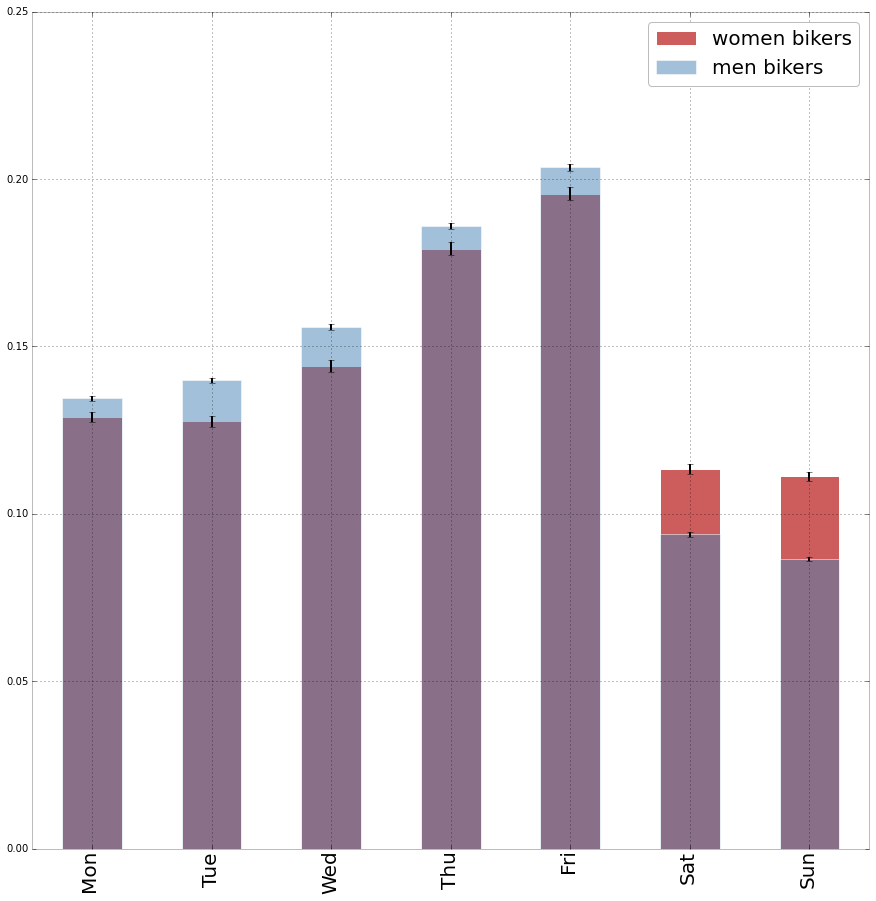

In [56]:
fig=pl.figure(figsize(15,15))

norm_w= counts_w.sum()
error_w=np.sqrt(counts_w)
((counts_w)/norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w)/norm_w,(error_w)/norm_w)], label='women bikers')

norm_m=counts_m.sum()
ax=((counts_m)/norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m)/norm_m,(error_m)/norm_m)], label='men bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)

pl.legend(['women bikers','men bikers'],fontsize=20)


we can add up the week and weekend days, then this becomes a test of proportions, like the one seen in the employment notebook

0.819765195553 0.180234804447 0.0018971523023 0.000889563160544
0.775440078321 0.224559921679 0.00385819734077 0.00207623467386
0.775440078321 0.819765195553 0.811514452024 0.00189942880377 -23.3360245689


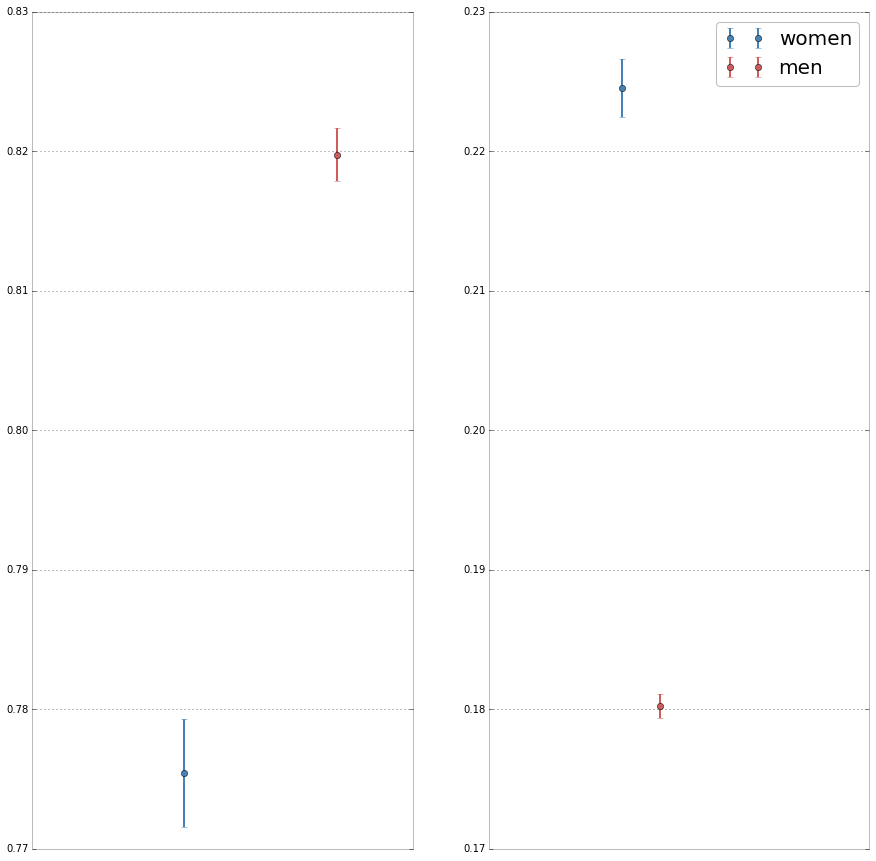

In [87]:
fig=pl.figure(figsize(15,15))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])
week_w = sum(counts_w[:-2])*1.0/norm_w
weekend_w = sum(counts_w[-2:])*1.0/norm_w
eweek_w = np.sqrt(sum(error_w[:-2]**2))/norm_w
eweekend_w = np.sqrt(sum(error_w[-2:]**2))/norm_w

week_m = sum(counts_m[:-2])*1.0/norm_m
weekend_m = sum(counts_m[-2:])*1.0/norm_m
eweek_m = np.sqrt(sum(error_m[:-2]**2))/norm_m
eweekend_m = np.sqrt(sum(error_m[-2:]**2))/norm_m

print week_m,weekend_m,eweek_m,eweekend_m
print week_w,weekend_w,eweek_w,eweekend_w

ax1.errorbar([0.2],[week_w], yerr=[eweek_w], fmt='o', label='women')
ax1.errorbar([0.4],[week_m], yerr=[eweek_m], fmt='o', label='men')
ax1.set_xlim(0,0.5)
ax2.errorbar([0.2],[weekend_w], yerr=[eweekend_w], fmt='o', label='women')
ax2.errorbar([0.4],[weekend_m], yerr=[eweekend_m], fmt='o', label='men')
ax1.set_xlim(0,0.5)
pl.xlim(-0.5,1.5)
pl.legend(fontsize=20)

p = (week_w*norm_w + week_m*norm_m)*1.0/ (norm_w + norm_m)
SE = np.sqrt(p * ( 1. - p ) * ( (1./norm_w) + (1./norm_m) ) )
z = (week_w - week_m ) / SE
print week_w, week_m, p,SE,z

is the percentage of women that ride on weekends lower or equal to that of man?

In [58]:
P0mP1=weekend_m-weekend_w
print P0mP1

-0.0443251172318


but is it statistically significant?

In [59]:
sp_stdev= lambda p0, n1: np.sqrt(p0*(1-p0)/n1)
sp_stdev_mw=sp_stdev(weekend_w,norm_m)

zscore = lambda p0, p1, s : (p0-p1)/s
z = zscore(weekend_w, weekend_m, sp_stdev_mw)
print z 

50.693489576


#lets see if out test holds in the summer, when outfits are more ameable to riding

In [60]:
df_06=pd.read_csv('data/201506-citibike-tripdata.csv')
df_06.date = pd.to_datetime(df.starttime)

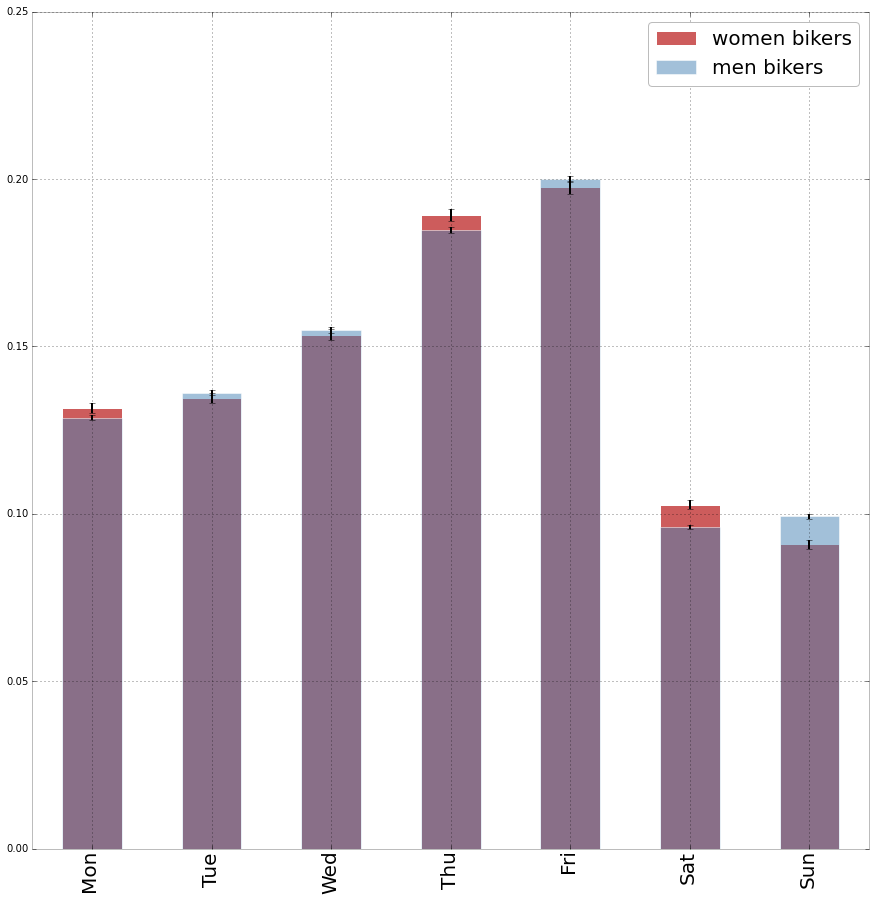

In [70]:
fig=pl.figure(figsize(15,15))

counts_w06= df_06.date[df_06.gender==2].groupby([df_06.date.dt.weekday]).count()
norm_w06= counts_w06.sum()
error_w06=np.sqrt(counts_w06)

((counts_w06)/norm_w06).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w06)/norm_w06,(error_w06)/norm_w06)], label='women bikers, June')

counts_m06=df_06.date[df_06.gender==1].groupby([df_06.date.dt.weekday]).count()
norm_m06= counts_m06.sum()
error_m06=np.sqrt(counts_m06)
ax=((counts_m06)/norm_m06).plot(kind="bar", alpha=0.5, yerr=[((error_m06)/norm_m06,(error_m06)/norm_m06)], label='men bikers, June')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)

pl.legend(['women bikers','men bikers'],fontsize=20)

0.804666118609 0.195333881391 0.00204615224675 0.00100813542825
0.806490872211 0.193509127789 0.00377161494892 0.00184747405416
0.806490872211 0.804666118609 0.805081783446 0.00189324480289 0.963823378172


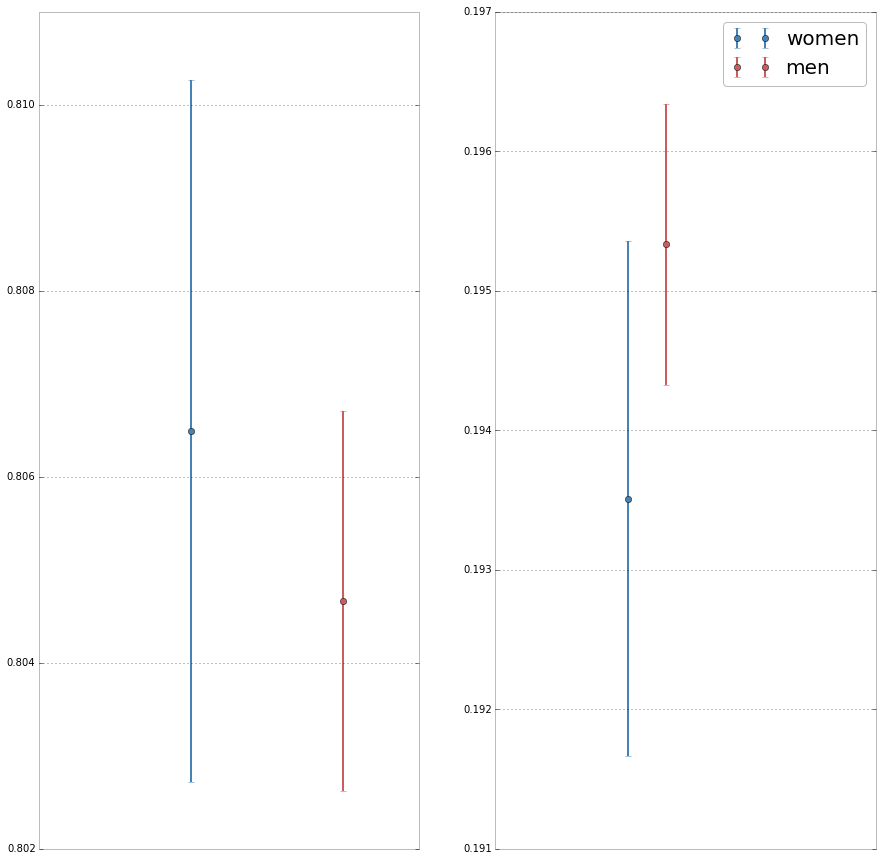

In [86]:
fig=pl.figure(figsize(15,15))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])
week_w = sum(counts_w06[:-2])*1.0/norm_w06
weekend_w = sum(counts_w06[-2:])*1.0/norm_w06
eweek_w = np.sqrt(sum(error_w06[:-2]**2))/norm_w06
eweekend_w = np.sqrt(sum(error_w06[-2:]**2))/norm_w06

week_m = sum(counts_m06[:-2])*1.0/norm_m06
weekend_m = sum(counts_m06[-2:])*1.0/norm_m06
eweek_m = np.sqrt(sum(error_m06[:-2]**2))/norm_m06
eweekend_m = np.sqrt(sum(error_m06[-2:]**2))/norm_m06

print week_m,weekend_m,eweek_m,eweekend_m
print week_w,weekend_w,eweek_w,eweekend_w

ax1.errorbar([0.2],[week_w], yerr=[eweek_w], fmt='o', label='women')
ax1.errorbar([0.4],[week_m], yerr=[eweek_m], fmt='o', label='men')
ax1.set_xlim(0,0.5)
ax2.errorbar([0.2],[weekend_w], yerr=[eweekend_w], fmt='o', label='women')
ax2.errorbar([0.4],[weekend_m], yerr=[eweekend_m], fmt='o', label='men')
ax1.set_xlim(0,0.5)
pl.xlim(-0.5,1.5)
pl.legend(fontsize=20)

p = (week_w*norm_w06 + week_m*norm_m06)*1.0/ (norm_w06 + norm_m06)
SE = np.sqrt(p * ( 1. - p ) * ( (1./norm_w06) + (1./norm_m06) ) )
z = (week_w - week_m ) / SE
print week_w, week_m, p,SE,z